# Customer Sentimental Analysis - Iphone 15 128gb

__Objective__:

As a Data Analyst at Flipkart, analyze customer sentiment towards the iPhone 15 128GB model 
by evaluating reviews using sentiment analysis. The goal is to gain insights into public 
perception, identify product strengths and weaknesses, and support decision-making.

__Libraries and Tools__:\
• __Selenium:__ Web scraping automation.\
• __BeautifulSoup:__ HTML parsing.\
• __Pandas:__ Data cleaning and analysis.\
• __TextBlob:__ Sentiment analysis.\
• __Matplotlib/Seaborn:__ Data visualization.


# 1. Data Collection (Web Scraping): 
* __Tools:__ Selenium, BeautifulSoup
* __Steps:__

        – Use Selenium to scrape at least 300 reviews from Flipkart's iPhone 15 128GB 
          product page.
        – Extract __Username, Rating,__ and __Review Text.__
        – Handle pagination to collect reviews from multiple pages.

In [1]:
# Import the necessary libraries 
import requests
import time
import pandas as pd 
from bs4 import BeautifulSoup
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys


# Create empty lists to store the user data such as Name, City, Date of Purchase, Review & Rating

Names = []
Cities = []
Dates = []
Reviews = []
Ratings = []

# Assign the url of the flipkart website and use selenium to scrape data
url= """https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid
=LSTMOBGTAGPAQNVFZZYQRLPCQ&marketplace=FLIPKART"""


driver = webdriver.Chrome()
driver.get(url)

while len(Names) < 320:
    
    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    
    # Extract names
    names_elements= soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in  names_elements:
        Names.append(name.text)
        
    # Extract cities
    city_elements = soup.find_all("p", {"class": "MztJPv"}) 
    for city in city_elements:
        Cities.append(city.text)
        
    # Extract dates
    dates_elements = soup.find_all("p", {"class": "_2NsDsF"}) 
    for date in dates_elements:
        Dates.append(date.text)
    Actual_Dates = Dates[1::2]
    
    # Extract reviews
    reviews_elements = soup.find_all("div", {"class": "ZmyHeo"})
    for review in reviews_elements:
        Reviews.append(review.text)
        
    # Extract ratings
    ratings_elements = soup.find_all("div", class_ = "XQDdHH Ga3i8K")
    for ratings in ratings_elements:
        Ratings.append(ratings.text)
        
    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH, 
"//span[text()='Next']")
        next_button.click()
        time.sleep(5)
    except:
        break
        


In [4]:
# Combine data into a DataFrame
df = pd.DataFrame({
    "Name": Names[:-1],
    "City": Cities[:-1],
    "Date": Actual_Dates[:-1],
    "Review": Reviews[:-1],
    "Ratings": Ratings
 })

# __2. Data Cleaning and Preprocessing:__

 * Tool: Pandas
 * Steps:–Remove duplicates and handle missing values.–Text Preprocessing:
 * Convert text to lowercase, remove special characters, and extra spaces.
 * Tokenize text, remove stop words, and apply lemmatization.

In [5]:
# Check the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     319 non-null    object
 1   City     319 non-null    object
 2   Date     319 non-null    object
 3   Review   319 non-null    object
 4   Ratings  319 non-null    object
dtypes: object(5)
memory usage: 12.6+ KB


In [6]:
# Drop the duplicates from the dataframe
df1 = df.copy()
df1 = df1.drop_duplicates()
df1

,Name,City,Date,Review,Ratings
0,CHETAN TILWALIA,"Certified Buyer, Loni",10 months ago,Nice 👌READ MORE,5
1,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
2,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
...,...,...,...,...,...
314,Rohit Kumar Mishra,"Certified Buyer, Jodhpur District","Jan, 2024",Nice iPhoneREAD MORE,5
315,Ajith Perumal,"Certified Buyer, Mamallapuram","Feb, 2024",This phone has comfy feelREAD MORE,5
316,Akshat Dwivedi,"Certified Buyer, New Delhi","Feb, 2024",Pros of iPhone 15:1. Best camera in the segmen...,5
317,Leo Jonas Doyom,"Certified Buyer, Naharlagun","Feb, 2024",Great device The 60hz is not a big deal like t...,5


In [7]:
#Convert the Name column data into Title Case
df1['Name'] = df1['Name'].str.title()
df1.head()

,Name,City,Date,Review,Ratings
0,Chetan Tilwalia,"Certified Buyer, Loni",10 months ago,Nice 👌READ MORE,5
1,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
2,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5


In [8]:
# Clean data of City column by removing unwanted characters/ part of string
df1['City'] = df1['City'].str.replace("Certified Buyer, ", "", 
regex=False).str.strip()
df1.head()

,Name,City,Date,Review,Ratings
0,Chetan Tilwalia,Loni,10 months ago,Nice 👌READ MORE,5
1,Ajin V,Balaghat,"Oct, 2023",High quality camera😍READ MORE,5
2,Mousam Guha Roy,Matialihat,"Oct, 2023",Very niceREAD MORE,4
3,Prithivi Boruah,Bokajan,"Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,Meerut Division,"Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5


In [9]:
# Clean data of Review column by removing unwanted characters/ part of string and converting to lowercase
df1['Review'] = df1['Review'].str.lower().str.replace("read more", "", 
regex=False)
df1.head()

,Name,City,Date,Review,Ratings
0,Chetan Tilwalia,Loni,10 months ago,nice 👌,5
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5
2,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5


# 3. Sentiment Analysis:
 * Tool: TextBlob
 * Steps:
 
        – Analyze sentiment using TextBlob’s polarity score (-1 to +1).
        – Classify sentiment:
             - Positive: Polarity ≥ 0.1 
             - Negative: Polarity < 0.1 
        – Store sentiment classification in the dataset.

In [17]:
# Import libraries for Sentimental analysis of review sentences 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob

import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# Create a column called Reviews_t that stores tokenized sentences from the Review column using the sent_tokenize function.
df1["Reviews_t"] = df1['Review'].apply(sent_tokenize)
df1

[nltk_data] Downloading package stopwords to C:\Users\RAHUL
[nltk_data]     NAGRA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\RAHUL
[nltk_data]     NAGRA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\RAHUL
[nltk_data]     NAGRA\AppData\Roaming\nltk_data...


,Name,City,Date,Review,Ratings,Reviews_t
0,Chetan Tilwalia,Loni,10 months ago,nice 👌,5,[nice 👌]
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍]
2,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice]
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it]
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...
...,...,...,...,...,...,...
314,Rohit Kumar Mishra,Jodhpur District,"Jan, 2024",nice iphone,5,[nice iphone]
315,Ajith Perumal,Mamallapuram,"Feb, 2024",this phone has comfy feel,5,[this phone has comfy feel]
316,Akshat Dwivedi,New Delhi,"Feb, 2024",pros of iphone 15:1. best camera in the segmen...,5,[pros of iphone 15:1. best camera in the segme...
317,Leo Jonas Doyom,Naharlagun,"Feb, 2024",great device the 60hz is not a big deal like t...,5,[great device the 60hz is not a big deal like ...


In [20]:
# Import mean from statistics for basic statistics
from statistics import mean

# Function created for assigning Polarity to the Reviews_t column
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Calls get_polarity function on the Reviews_t column to assign polarity
df1['Polarity'] = df1['Reviews_t'].apply(get_polarity)

# Function created to calculate the average polarity of each review (Average of polarity for each sentences in a review)
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

# Calls calculate_average_polarity function on the Polarity column to assign the average polarity for each review
df1['Average_Polarity'] = df1['Polarity'].apply(calculate_average_polarity)
df1['Average_Polarity'] = df1['Average_Polarity'].round(2)
df1.head(10)

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity
0,Chetan Tilwalia,Loni,10 months ago,nice 👌,5,[nice 👌],[0.6],0.60
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16
2,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50
5,Bijaya Mohanty,Baleshwar,9 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27
6,Flipkart Customer,Aizawl,"Jan, 2024",awesome photography experience. battery backup...,5,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.73
7,Sheetla Prasad Maurya,Sultanpur,"Oct, 2023",best mobile phonecamera quality is very nice b...,4,[best mobile phonecamera quality is very nice ...,[0.738],0.74
8,Flipkart Customer,Agartala,10 months ago,using this iphone 15 from 1month and it has be...,5,[using this iphone 15 from 1month and it has b...,[1.0],1.00
9,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this. bette...,5,"[awesome product very happy to hold this., bet...","[1.0, 0.5, 0.45555555555555555]",0.65


In [32]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'
    
# Calls sentiment_class function on the Average_Polarit column to assign the sentiment class
df1['Sentiment_Class'] = df1['Average_Polarity'].apply(sentiment_class)
df1.head()


,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity,Sentiment_Class,Review_Length
0,Chetan Tilwalia,Loni,10 months ago,nice 👌,5,[nice 👌],[0.6],0.60,positive,2
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16,positive,3
2,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78,extremely positive,2
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60,positive,6
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50,positive,17


In [23]:
# Calculates and prints the overall average polarity score of the entire dataset of reviews
polarity_score = df1['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')
if polarity_score > 0.75:
    print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')

Average Polarity Score : 0.51
The Average Polarity Score is Positive


# 4. Data Analysis and Insights:
 * Tools: Pandas, Matplotlib/Seaborn
 * Steps:
 
        – Sentiment Distribution: Calculate positive and negative sentiment proportions.
        – Average Rating vs Sentiment: Analyze correlation between numeric ratings (1-5 stars) and sentiment.
        – Word Cloud: Generate a word cloud for frequently mentioned words in positive/negative reviews.
        – Review Length Analysis: Investigate the relationship between review length and sentiment.

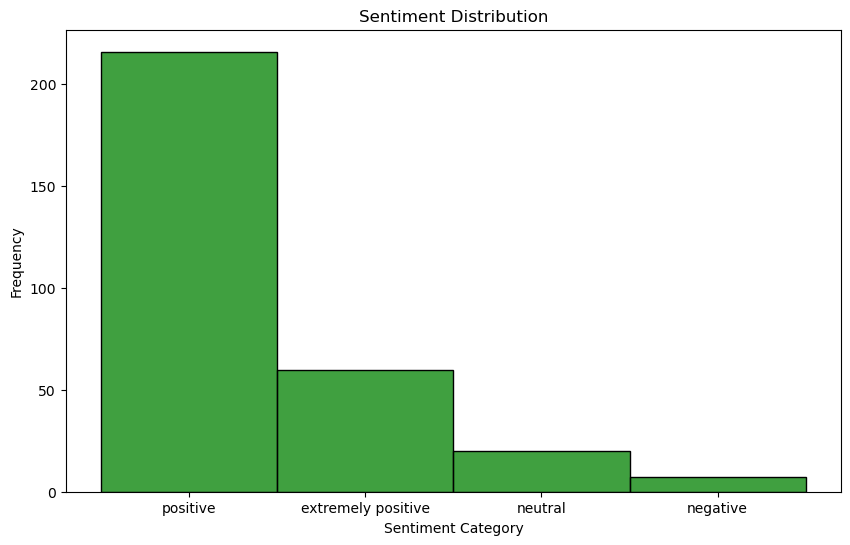

In [27]:
# Imports libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6))
sns.histplot(x=df1.Sentiment_Class, color='green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Sentiment Distribution

The bar chart visualizes the distribution of sentiment categories in the dataset. The x-axis 
represents various sentiment categories, and the y-axis shows the frequency of occurrences in 
each category. The categories are as follows:

1. Positive: The most frequent sentiment, with over 200 instances.
2. Extremely Positive: This category follows, though it appears much less frequently than "Positive".
3. Neutral: Appears less often than both positive categories.
4. Negative: The least frequent sentiment in the dataset.

The chart clearly demonstrates a strong inclination towards positive sentiments, with "Positive" 
being the predominant category, followed by "Extremely Positive". Both neutral and negative 
sentiments occur much less frequently

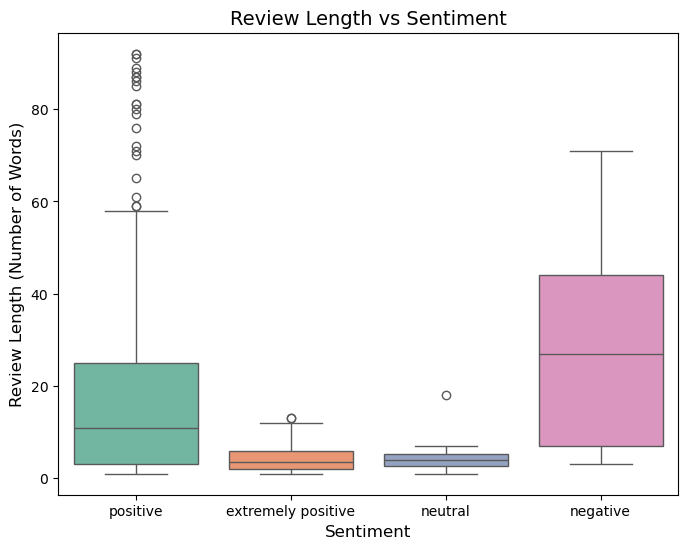

In [38]:
df1['Review_Length'] = df1['Review'].apply(lambda x: len(x.split()))
# Box Plot for Review Length by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df1, hue ='Sentiment_Class', palette='Set2')
plt.title('Review Length vs Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (Number of Words)', fontsize=12)
plt.show()

# Review Length Vs Sentiment

Correlation:

           • Reviews with more positive sentiment tend to align with higher ratings (e.g., 4.5–5 
             stars), as demonstrated by the clustering and color gradient.

Neutral Reviews:

         • Neutral reviews are spread across various ratings, suggesting that sentiment does not 
           always align with the assigned star rating.

Negative Reviews:

         • Negative and extremely negative reviews typically receive lower ratings, but they can 
           still vary due to individual reviewer perspectives and subjective interpretation.


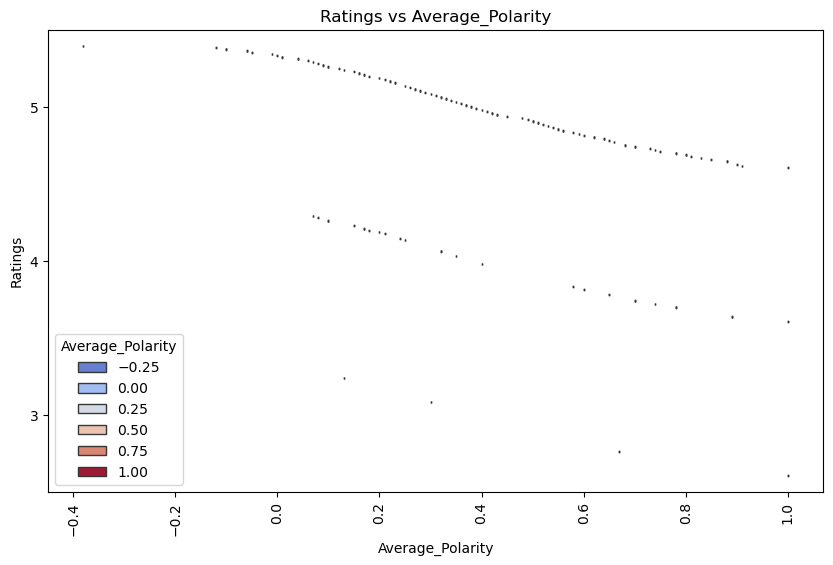

In [50]:
# Plotting ratings vs average polarity
plt.figure(figsize=(10,6))
sns.boxplot(x='Average_Polarity', y='Ratings', data = df1, hue ='Average_Polarity', palette='coolwarm')
plt.title('Ratings vs Average_Polarity')
plt.xlabel('Average_Polarity')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()

# Ratings vs Average Polarity:

Positive Sentiment:

        • Shows the widest variation in review length, with a few notable outliers.
        • The median review length is higher than that of other sentiment categories.

Extremely Positive Sentiment:

        • Has the shortest overall review lengths, with a tighter distribution and fewer outliers.

Neutral Sentiment:

        • Displays a narrower range of review lengths, similar to the "Extremely Positive" 
          sentiment group.


Negative Sentiment:

        • Exhibits a moderate range of review lengths.
        • The median length is shorter than "Positive" but longer than both "Extremely Positive" 
          and "Neutral."
          
Interpretation:

        • Positive reviews are generally more detailed (longer) compared to other sentiment 
          categories.
        • Extremely positive and neutral reviews are typically short.
        • Negative reviews vary in length but tend to be more concise than positive ones.

# 5. Reporting:

• Summarize findings, including:

    - Overview of data collection and cleaning.
    - Sentiment Analysis Results: Distribution of sentiments, average sentiment per rating.
    - Insights: Key trends, issues, and positive highlights.
    - Recommendations: Based on sentiment, suggest areas for product improvement or marketing.
    
**Sentiment Analysis Report: Customer Reviews of the iPhone 15 128GB on Flipkart**

1. Data Collection and Cleaning Process

• Data Source: Customer reviews for the iPhone 15 128GB were gathered from Flipkart 
using web scraping techniques with tools such as Selenium and BeautifulSoup.

• Data Preparation:

    - The reviews were preprocessed by removing unnecessary characters, 
       standardizing text formatting, and eliminating excess spaces.––
    - Text data was tokenized to prepare it for further analysis.
    - Sentiments were categorized into different labels (e.g., positive, extremely 
      positive, neutral, negative, extremely negative) using sentiment analysis methods.
      
      
2. Sentiment Analysis Findings

• Sentiment Breakdown:

    - A majority of the reviews expressed positive sentiment, followed by a smaller 
      share of extremely positive feedback, as shown in the sentiment distribution chart.
    - Neutral and negative reviews represented a much smaller percentage of the total feedback.

• Sentiment by Rating:

    - Higher star ratings were generally associated with positive or extremely positive sentiments.
    - Lower star ratings tended to correspond with more neutral or negative feedback, 
      signaling dissatisfaction among those customers.
      
3. Key Insights

• Positive Aspects:

        - Customers frequently praised the design, camera quality, and overall 
          performance of the iPhone 15.
        - Many reviews highlighted improvements in battery life as a notable positive feature.

• Common Complaints*:

        - Neutral and negative reviews often pointed to pricing issues and occasional 
          problems with delivery or packaging.
        - A few customers mentioned compatibility problems with certain accessories and 
          minor software glitches.

4. Recommendations

• Product Enhancements

        - Address minor software glitches mentioned by users to improve overall experience.
        - Look into compatibility issues with accessories to ensure that users have a 
          smooth and hassle-free experience.

• Marketing Suggestions

        - Emphasize the camera quality, battery life, and sleek design in future marketing campaigns.
        - Mitigate pricing concerns by offering EMI options, exchange offers, or time
          limited discounts to make the product more accessible.

• Operational Improvements

        - Focus on enhancing delivery services to reduce complaints related to packaging 
          or shipping delays.
        - Keep a close eye on customer feedback to swiftly identify and resolve any new 
          issues that arise.